<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I-V DIODOS

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1OaOgqJcIpm8wSChrqsEl4dgfwYktI2UDR0WOJpWnwsM/edit#gid=314007684')
worksheet=wb.worksheet('CURVA I-V DIODOS')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[1]
titles=titles.iloc[1:2]
d1 = d1.iloc[2:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1,Vd1 [V],Id1 [mA],Ln1,Vd2 [V],Id2 [mA],Ln2,Vd3 [V],Id3 [mA],Ln3,Vd4 [V],Id4 [mA],Ln4,Vd5 [V],Id5 [mA],Ln5
2,0.90,0.00001,-11.1212,1.58,0.00015,-8.7905,1.80,0.00002,-11.0721,1.80,0.00002,-10.7886,2.40,0.00,-10.2252
3,0.92,0.00002,-10.6377,1.60,0.00023,-8.3832,1.82,0.00003,-10.4769,1.82,0.00003,-10.3335,2.42,0.00,-9.7094
4,0.94,0.00004,-10.1541,1.62,0.00034,-7.9760,1.84,0.00005,-9.8818,1.84,0.00005,-9.8784,2.44,0.00,-9.1936
5,0.96,0.00006,-9.6705,1.64,0.00052,-7.5670,1.86,0.00009,-9.2866,1.86,0.00008,-9.4233,2.46,0.00,-8.6778
6,0.98,0.00010,-9.1870,1.66,0.00077,-7.1643,1.88,0.00017,-8.6915,1.88,0.00013,-8.9681,2.48,0.00,-8.1620


In [ ]:
nombres=d1.columns[0:15]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
d1.columns[0]

'Vd1 [V]'

#Funciones

In [ ]:
def f1(x,a,b):
  return a*x+b

In [ ]:
def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

In [ ]:
def gaussiana(x, a, b, c):
	return a * np.exp(-((x-b)**2)/(c))

In [ ]:
def met3(x7,y7,x8,y8): 
  for i in range(np.size(x7)-1):
    if (x7[i] == x7[i +1]):
      continue
    f = (y7[i + 1] - y7[i])/(x7[i +1] - x7[i])
    y8.append(f)
    x8.append(x7[i])
  return(x8,y8)

Text(0.5, 1.0, '[Diodo infrarrojo] Ln ($I_D$) vs $V_D$ [V]')

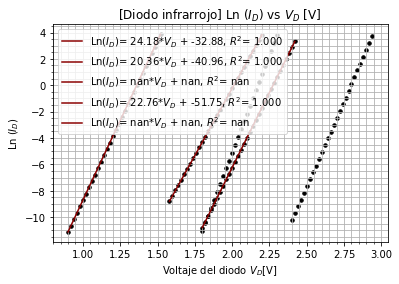

In [ ]:
lov = [0,3,6,9,12] 

for ii in lov: 
  valx1=d1.loc[0:33,d1.columns[ii]]
  valy1=d1.loc[0:33,d1.columns[ii+2]]
  x1=valx1.values 
  y1=valy1.values

  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="darkred",label='Ln($I_D$)= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] Ln ($I_D$) vs $V_D$ [V]")


#METODO 1

Ajuste, pendiente  24.17763 +-  0.00049, intercept  -32.88087 +-  0.00059 
$R^2$ = 1.000
Eg = 2.17595E-19, V_0 =  1.35997, h =  6.75271E-34


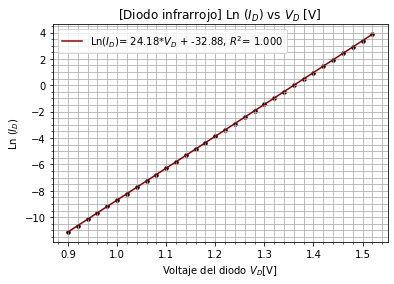

In [ ]:
valx1=d1.loc[0:33,"Vd1 [V]"]
valy1=d1.loc[0:33,"Ln1"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="darkred",label='Ln($I_D$)= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] Ln ($I_D$) vs $V_D$ [V]")
#INCERTIDUMBRES
lam = 931
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= -intercept1/gradient1*(el)
V_0 = -intercept1/gradient1
cv = 3*10**(8)
h = (el/cv)* V_0 *lam*10**(-9)
print("Ajuste, pendiente  %5.5f +-  %5.5f, intercept  %5.5f +-  %5.5f "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente  20.36031 +-  0.00045, intercept  -40.95974 +-  0.00083 
$R^2$ = 1.000
Eg = 3.21879E-19, V_0 =  2.01174, h =  6.71654E-34


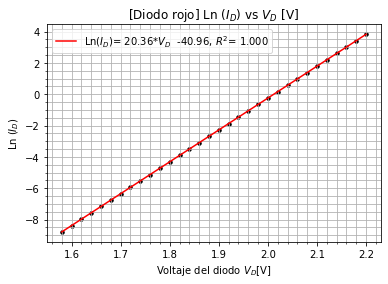

In [ ]:
valx1=d1.loc[0:33,"Vd2 [V]"]
valy1=d1.loc[0:33,"Ln2"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="red",label='Ln($I_D$)= %2.2f*$V_D$  %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo rojo] Ln ($I_D$) vs $V_D$ [V]")
#INCERTIDUMBRES
lam = 626
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= -intercept1/gradient1*(el)
V_0 = -intercept1/gradient1
cv = 3*10**(8)
h = (el/cv)* V_0 *lam*10**(-9)
print("Ajuste, pendiente  %5.5f +-  %5.5f, intercept  %5.5f +-  %5.5f "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente  29.75810 +-  0.00045, intercept  -64.63687 +-  0.00091 
$R^2$ = 1.000
Eg = 3.47532E-19, V_0 =  2.17208, h =  6.71896E-34


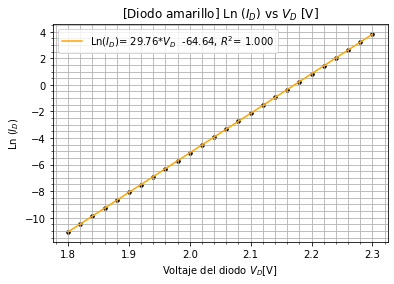

In [ ]:
valx1=d1.loc[0:27,"Vd3 [V]"]
valy1=d1.loc[0:27,"Ln3"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="orange",label='Ln($I_D$)= %2.2f*$V_D$  %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo amarillo] Ln ($I_D$) vs $V_D$ [V]")
#INCERTIDUMBRES
lam = 580
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= -intercept1/gradient1*(el)
V_0 = -intercept1/gradient1
cv = 3*10**(8)
h = (el/cv)* V_0 *lam*10**(-9)
print("Ajuste, pendiente  %5.5f +-  %5.5f, intercept  %5.5f +-  %5.5f "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente  22.75586 +-  0.00026, intercept  -51.74923 +-  0.00055 
$R^2$ = 1.000
Eg = 3.63857E-19, V_0 =  2.27411, h =  6.71923E-34


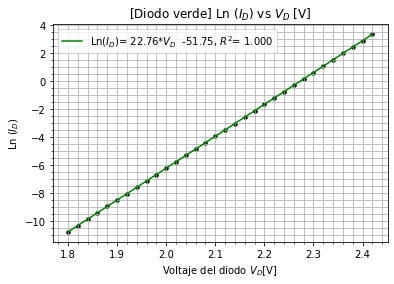

In [ ]:
valx1=d1.loc[0:33,"Vd4 [V]"]
valy1=d1.loc[0:33,"Ln4"]
x1=valx1.values 
y1=valy1.values

plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="green",label='Ln($I_D$)= %2.2f*$V_D$  %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo verde] Ln ($I_D$) vs $V_D$ [V]")
#INCERTIDUMBRES
lam = 554
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= -intercept1/gradient1*(el)
V_0 = -intercept1/gradient1
cv = 3*10**(8)
h = (el/cv)* V_0 *lam*10**(-9)
print("Ajuste, pendiente  %5.5f +-  %5.5f, intercept  %5.5f +-  %5.5f "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente  25.79060 +-  0.00027, intercept  -72.12298 +-  0.00071 
$R^2$ = 1.000
Eg = 4.47437E-19, V_0 =  2.79648, h =  6.65190E-34


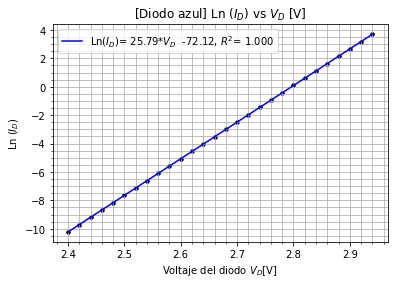

In [ ]:
valx1=d1.loc[0:29,"Vd5 [V]"]
valy1=d1.loc[0:29,"Ln5"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="blue",label='Ln($I_D$)= %2.2f*$V_D$  %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Ln ($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo azul] Ln ($I_D$) vs $V_D$ [V]")
#INCERTIDUMBRES
lam = 446
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= -intercept1/gradient1*(el)
V_0 = -intercept1/gradient1
cv = 3*10**(8)
h = (el/cv)* V_0 *lam*10**(-9)
print("Ajuste, pendiente  %5.5f +-  %5.5f, intercept  %5.5f +-  %5.5f "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Text(0.5, 1.0, '[Diodo azul] ($I_D$) vs $V_D$ [V]')

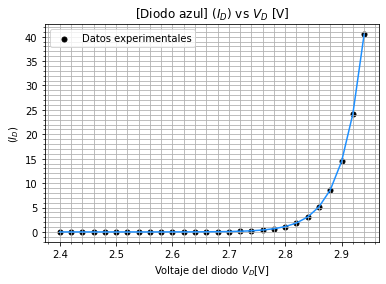

In [ ]:
valx1=d1.loc[0:29,"Vd5 [V]"]
valy1=d1.loc[0:29,"Id5 [mA]"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=25, label = "Datos experimentales")
plt.plot(x1,y1,color="dodgerblue")
plt.minorticks_on()
plt.grid(b=True,which="both")

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("($I_D$)")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo azul] ($I_D$) vs $V_D$ [V]")

#METODO 2

Ajuste, pendiente M1  10.36545 +-  0.79726, intercept B1 -10.49626 +-  0.85280, $R^2$ = 0.695 
Ajuste, pendiente M2  4279.51970 +-  85.32039, intercept B2 -5796.52487 +-  113.39591, $R^2$ = 0.871  
Valor de V_0:  1.3553102751183126
Eg = 2.16850E-19, V_0 =  1.35531, h =  6.72234E-34


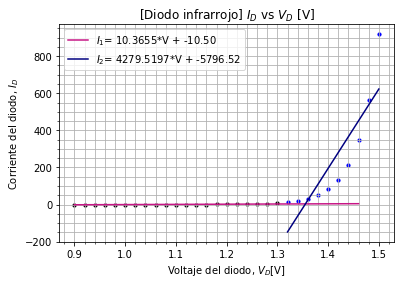

In [ ]:
#Intervalos
l1 =21
l2 =33
#Derivada
valx=d1.loc[0:l2,"Vd1 [V]"]
valy=d1.loc[0:l2,"Id1 [mA]"]
x=valx.values 
y=valy.values
xp = []
yp = []
xp,yp = met3(x,y,xp,yp)

x1=np.array(xp[0:l1])
y1=np.array(yp[0:l1])
x2=np.array(xp[l1:l2])
y2=np.array(yp[l1:l2])
##


to =  np.linspace(x1[0],x2[np.size(x2)-3],10) 

plt.scatter(x1,y1,color="black",s=10)
plt.scatter(x2,y2,color="blue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(to, f1(to, gradient1, intercept1), 'b-',color="mediumvioletred",label='$I_1$= %4.4f*V + %4.2f' % (gradient1, intercept1))
gradient2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
plt.plot(x2, f1(x2, gradient2, intercept2), 'b-',color="navy",label='$I_2$= %4.4f*V + %4.2f' % (gradient2, intercept2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("$I_D$")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
er_m1, er_b1 = ERROR(x1,y1,gradient1,intercept1)
print("Ajuste, pendiente M1  %5.5f +-  %5.5f, intercept B1 %5.5f +-  %5.5f, $R^2$ = %4.3f "%(gradient1,er_m1,intercept1, er_b1,r_value1)) 
er_m2, er_b2 = ERROR(x2,y2,gradient2,intercept2)
print("Ajuste, pendiente M2  %5.5f +-  %5.5f, intercept B2 %5.5f +-  %5.5f, $R^2$ = %4.3f  "%(gradient2,er_m2,intercept2, er_b2,r_value2)) 
#plt.xlim([-4, 0])
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente del diodo, $I_D$")
plt.xlabel("Voltaje del diodo, $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
V_0 = -(intercept1-intercept2)/(gradient1-gradient2)
print("Valor de V_0: ",V_0 )
lam = 930
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= V_0 *(el)
cv = 3*10**(8)
h = (el/cv)*lam*10**(-9)* V_0
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente M1  20.48344 +-  0.95620, intercept B1 -34.58626 +-  1.65518, $R^2$ = 0.738 
Ajuste, pendiente M2  3693.26545 +-  43.82706, intercept B2 -7491.86150 +-  86.50889, $R^2$ = 0.900  
Valor de V_0:  2.03041596521702
Eg = 3.24867E-19, V_0 =  2.03042, h =  6.77888E-34


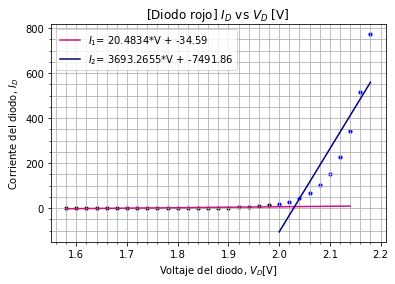

In [ ]:
#Intervalos
l1 =21
l2 =33
#Derivada
valx=d1.loc[0:l2,"Vd2 [V]"]
valy=d1.loc[0:l2,"Id2 [mA]"]
x=valx.values 
y=valy.values
xp = []
yp = []
xp,yp = met3(x,y,xp,yp)

x1=np.array(xp[0:l1])
y1=np.array(yp[0:l1])
x2=np.array(xp[l1:l2])
y2=np.array(yp[l1:l2])
##

to =  np.linspace(x1[0],x2[np.size(x2)-3],10) 

plt.scatter(x1,y1,color="black",s=10)
plt.scatter(x2,y2,color="blue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(to, f1(to, gradient1, intercept1), 'b-',color="mediumvioletred",label='$I_1$= %4.4f*V + %4.2f' % (gradient1, intercept1))
gradient2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
plt.plot(x2, f1(x2, gradient2, intercept2), 'b-',color="navy",label='$I_2$= %4.4f*V + %4.2f' % (gradient2, intercept2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("$I_D$")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
er_m1, er_b1 = ERROR(x1,y1,gradient1,intercept1)
print("Ajuste, pendiente M1  %5.5f +-  %5.5f, intercept B1 %5.5f +-  %5.5f, $R^2$ = %4.3f "%(gradient1,er_m1,intercept1, er_b1,r_value1)) 
er_m2, er_b2 = ERROR(x2,y2,gradient2,intercept2)
print("Ajuste, pendiente M2  %5.5f +-  %5.5f, intercept B2 %5.5f +-  %5.5f, $R^2$ = %4.3f  "%(gradient2,er_m2,intercept2, er_b2,r_value2)) 
#plt.xlim([-4, 0])
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente del diodo, $I_D$")
plt.xlabel("Voltaje del diodo, $V_D$[V]")
plt.title("[Diodo rojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
V_0 = -(intercept1-intercept2)/(gradient1-gradient2)
print("Valor de V_0: ",V_0 )
lam = 626
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= V_0 *(el)
cv = 3*10**(8)
h = (el/cv)*lam*10**(-9)* V_0
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente M1  26.19079 +-  1.04130, intercept B1 -49.65672 +-  1.98591, $R^2$ = 0.684 
Ajuste, pendiente M2  7439.35714 +-  62.41365, intercept B2 -16198.93079 +-  127.71748, $R^2$ = 0.902  
Valor de V_0:  2.178458340135493
Eg = 3.48553E-19, V_0 =  2.17846, h =  6.73870E-34


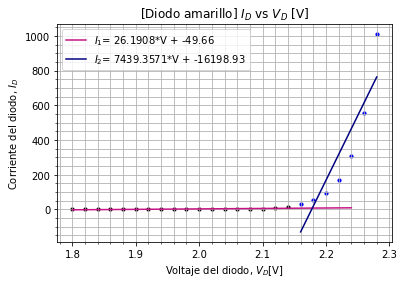

In [ ]:
#Intervalos
l1 =18
l2 =27

#Derivada
valx=d1.loc[0:l2,"Vd3 [V]"]
valy=d1.loc[0:l2,"Id3 [mA]"]
x=valx.values 
y=valy.values
xp = []
yp = []
xp,yp = met3(x,y,xp,yp)

x1=np.array(xp[0:l1])
y1=np.array(yp[0:l1])
x2=np.array(xp[l1:l2])
y2=np.array(yp[l1:l2])
##

to =  np.linspace(x1[0],x2[np.size(x2)-3],10) 

plt.scatter(x1,y1,color="black",s=10)
plt.scatter(x2,y2,color="blue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(to, f1(to, gradient1, intercept1), 'b-',color="mediumvioletred",label='$I_1$= %4.4f*V + %4.2f' % (gradient1, intercept1))
gradient2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
plt.plot(x2, f1(x2, gradient2, intercept2), 'b-',color="navy",label='$I_2$= %4.4f*V + %4.2f' % (gradient2, intercept2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("$I_D$")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
er_m1, er_b1 = ERROR(x1,y1,gradient1,intercept1)
print("Ajuste, pendiente M1  %5.5f +-  %5.5f, intercept B1 %5.5f +-  %5.5f, $R^2$ = %4.3f "%(gradient1,er_m1,intercept1, er_b1,r_value1)) 
er_m2, er_b2 = ERROR(x2,y2,gradient2,intercept2)
print("Ajuste, pendiente M2  %5.5f +-  %5.5f, intercept B2 %5.5f +-  %5.5f, $R^2$ = %4.3f  "%(gradient2,er_m2,intercept2, er_b2,r_value2)) 
#plt.xlim([-4, 0])
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente del diodo, $I_D$")
plt.xlabel("Voltaje del diodo, $V_D$[V]")
plt.title("[Diodo amarillo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
V_0 = -(intercept1-intercept2)/(gradient1-gradient2)
print("Valor de V_0: ",V_0 )
lam = 580
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= V_0 *(el)
cv = 3*10**(8)
h = (el/cv)*lam*10**(-9)* V_0
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente M1  7.83481 +-  0.34553, intercept B1 -14.97456 +-  0.67216, $R^2$ = 0.710 
Ajuste, pendiente M2  2381.43803 +-  27.78451, intercept B2 -5364.28770 +-  60.64028, $R^2$ = 0.882  
Valor de V_0:  2.253667791079755
Eg = 3.60587E-19, V_0 =  2.25367, h =  6.65884E-34


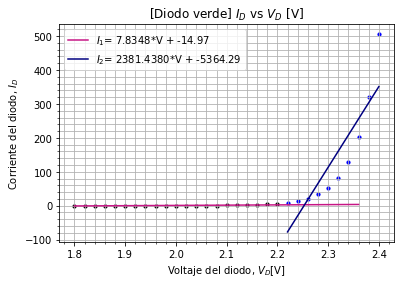

In [ ]:
#Intervalos
l1 =21
l2 =33

#Derivada
valx=d1.loc[0:l2,"Vd4 [V]"]
valy=d1.loc[0:l2,"Id4 [mA]"]
x=valx.values 
y=valy.values
xp = []
yp = []
xp,yp = met3(x,y,xp,yp)

x1=np.array(xp[0:l1])
y1=np.array(yp[0:l1])
x2=np.array(xp[l1:l2])
y2=np.array(yp[l1:l2])
##

to =  np.linspace(x1[0],x2[np.size(x2)-3],10) 

plt.scatter(x1,y1,color="black",s=10)
plt.scatter(x2,y2,color="blue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(to, f1(to, gradient1, intercept1), 'b-',color="mediumvioletred",label='$I_1$= %4.4f*V + %4.2f' % (gradient1, intercept1))
gradient2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
plt.plot(x2, f1(x2, gradient2, intercept2), 'b-',color="navy",label='$I_2$= %4.4f*V + %4.2f' % (gradient2, intercept2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("$I_D$")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
er_m1, er_b1 = ERROR(x1,y1,gradient1,intercept1)
print("Ajuste, pendiente M1  %5.5f +-  %5.5f, intercept B1 %5.5f +-  %5.5f, $R^2$ = %4.3f "%(gradient1,er_m1,intercept1, er_b1,r_value1)) 
er_m2, er_b2 = ERROR(x2,y2,gradient2,intercept2)
print("Ajuste, pendiente M2  %5.5f +-  %5.5f, intercept B2 %5.5f +-  %5.5f, $R^2$ = %4.3f  "%(gradient2,er_m2,intercept2, er_b2,r_value2)) 
#plt.xlim([-4, 0])
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente del diodo, $I_D$")
plt.xlabel("Voltaje del diodo, $V_D$[V]")
plt.title("[Diodo verde] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
V_0 = -(intercept1-intercept2)/(gradient1-gradient2)
print("Valor de V_0: ",V_0 )
lam = 554
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= V_0 *(el)
cv = 3*10**(8)
h = (el/cv)*lam*10**(-9)* V_0
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

Ajuste, pendiente M1  21.44737 +-  0.67920, intercept B1 -53.62368 +-  1.70037, $R^2$ = 0.706 
Ajuste, pendiente M2  5097.91667 +-  36.76239, intercept B2 -14280.00000 +-  97.67179, $R^2$ = 0.901  
Valor de V_0:  2.802415513614155
Eg = 4.48386E-19, V_0 =  2.80242, h =  6.66601E-34


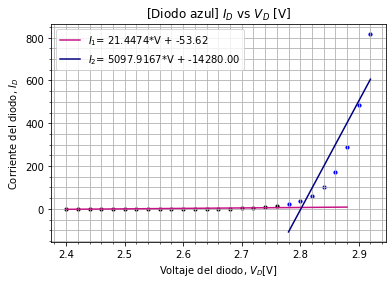

In [ ]:
#Intervalos
l1 =19
l2 =29

'''valx1=d1.loc[0:l1,"Vd5 [V]"]
valy1=d1.loc[0:l1,"Id5 [mA]"]
x1=valx1.values 
y1=valy1.values
valx2=d1.loc[l1:l2,"Vd5 [V]"]
valy2=d1.loc[l1:l2,"Id5 [mA]"]
x2=valx2.values 
y2=valy2.values'''

#Derivada
valx=d1.loc[0:l2,"Vd5 [V]"]
valy=d1.loc[0:l2,"Id5 [mA]"]
x=valx.values 
y=valy.values
xp = []
yp = []
xp,yp = met3(x,y,xp,yp)

x1=np.array(xp[0:l1])
y1=np.array(yp[0:l1])
x2=np.array(xp[l1:l2])
y2=np.array(yp[l1:l2])
##

to =  np.linspace(x1[0],x2[np.size(x2)-3],10) 

plt.scatter(x1,y1,color="black",s=10)
plt.scatter(x2,y2,color="blue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(to, f1(to, gradient1, intercept1), 'b-',color="mediumvioletred",label='$I_1$= %4.4f*V + %4.2f' % (gradient1, intercept1))
gradient2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
plt.plot(x2, f1(x2, gradient2, intercept2), 'b-',color="navy",label='$I_2$= %4.4f*V + %4.2f' % (gradient2, intercept2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("$I_D$")
plt.xlabel("Voltaje del diodo $V_D$[V]")
plt.title("[Diodo infrarrojo] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
er_m1, er_b1 = ERROR(x1,y1,gradient1,intercept1)
print("Ajuste, pendiente M1  %5.5f +-  %5.5f, intercept B1 %5.5f +-  %5.5f, $R^2$ = %4.3f "%(gradient1,er_m1,intercept1, er_b1,r_value1)) 
er_m2, er_b2 = ERROR(x2,y2,gradient2,intercept2)
print("Ajuste, pendiente M2  %5.5f +-  %5.5f, intercept B2 %5.5f +-  %5.5f, $R^2$ = %4.3f  "%(gradient2,er_m2,intercept2, er_b2,r_value2)) 
#plt.xlim([-4, 0])
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente del diodo, $I_D$")
plt.xlabel("Voltaje del diodo, $V_D$[V]")
plt.title("[Diodo azul] $I_D$ vs $V_D$ [V]")
#INCERTIDUMBRES
V_0 = -(intercept1-intercept2)/(gradient1-gradient2)
print("Valor de V_0: ",V_0 )
lam = 446
el = (1.6)*10**(-19)
er_m, er_b = ERROR(x1,y1,gradient1,intercept1)
Eg= V_0 *(el)
cv = 3*10**(8)
h = (el/cv)*lam*10**(-9)* V_0
print ("Eg = %5.5E, V_0 =  %5.5f, h =  %5.5E"% (Eg,V_0,h))
#print (np.format_float_scientific(h, precision = 1, exp_digits=1))

#Espectro

In [ ]:
worksheet2=wb.worksheet('ESPECTRO DIODOS')
rows2 = worksheet2.get_all_values()
df=pd.DataFrame(rows2)
titles2=pd.DataFrame(rows2)
df.columns = df.iloc[1]
titles2=titles2.iloc[1:2]
df = df.iloc[2:]
df.head()

1,λ1(nm),I1(u.a.),λ2(nm),I2(u.a.),λ3(nm),I3(u.a.),λ4(nm),I4(u.a.),λ5(nm),I5(u.a.)
2,1000,0.4,670,0.0,630,0.0,610,1.9,540,0.0
3,990,0.6,660,0.4,620,0.1,600,3.2,530,0.1
4,980,1.1,650,1.9,610,0.3,590,5.1,520,0.3
5,970,2.0,640,6.9,600,0.6,580,7.1,510,0.5
6,960,3.8,635,11.3,590,1.1,570,8.8,500,0.7


In [ ]:
nombres=df.columns.tolist()
for name in nombres:
  df[name]= pd.to_numeric(df[name])
# 
ran = (0,2,4,6,8)
lim = [20,16,12,13,22]


 desviacion estandar =  14.0 Lambda correspondiente 929.915371199404
9.123796079016017


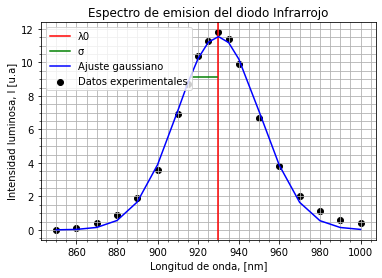

In [ ]:
valx=df.loc[:lim[0],df.columns[0]]
valy=df.loc[:lim[0],df.columns[1]]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values

plt.axvline(x=930,ymin=0,ymax=12, label = 'λ0',c="r")
plt.axhline(y=9.123,xmin=0.45,xmax=0.525, label = 'σ',c="g")
popt, pcov = curve_fit(gaussiana,x, y, p0 = (10,840,1000))
a, b, c = popt
desv=0.5*c**(0.5) #desviacion estandar
desv=round(desv,0)
plt.scatter(x,y,label="Datos experimentales",color="black")
plt.plot(x, gaussiana(x,*popt), color='blue',label="Ajuste gaussiano")

plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Longitud de onda, [nm]")
plt.ylabel("Intensidad luminosa, I [u.a]")
plt.title("Espectro de emision del diodo Infrarrojo")

print(  " desviacion estandar = ",   desv, "Lambda correspondiente", b )
jj += 1
k = a * np.exp(-(((930-desv)-b)**2)/(c))
print(k)

 desviacion estandar =  9.0 Lambda correspondiente 625.6844730134757


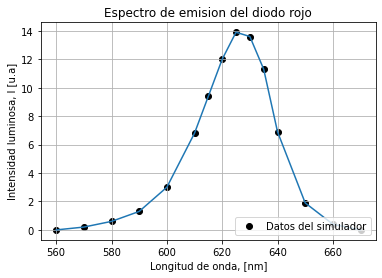

In [ ]:
valx=df.loc[:lim[1],df.columns[2]]
valy=df.loc[:lim[1],df.columns[3]]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values
plt.scatter(x,y,label="Datos del simulador",color="black")
plt.plot(x, y)

popt, pcov = curve_fit(gaussiana,x, y, p0 = (10,630,680))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: a=%2.2f, b=%2.2f, c=%2.2f' % tuple(popt))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: f(x) = 5.670 e-08 x^4')

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Longitud de onda, [nm]")
plt.ylabel("Intensidad luminosa, I [u.a]")
plt.title("Espectro de emision del diodo rojo")
  #Desv
a, b, c = popt
desv=0.5*c**(0.5) #desviaion estandar
desv=round(desv,0)
print(  " desviacion estandar = ",   desv, "Lambda correspondiente", b )

 desviacion estandar =  10.0 Lambda correspondiente 580.5713956238513


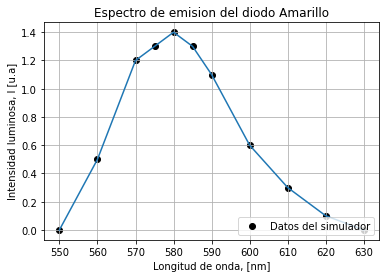

In [ ]:
valx=df.loc[:lim[2],df.columns[4]]
valy=df.loc[:lim[2],df.columns[5]]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values
plt.scatter(x,y,label="Datos del simulador",color="black")
plt.plot(x, y)

popt, pcov = curve_fit(gaussiana,x, y, p0 = (1.8,540,640))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: a=%2.2f, b=%2.2f, c=%2.2f' % tuple(popt))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: f(x) = 5.670 e-08 x^4')

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Longitud de onda, [nm]")
plt.ylabel("Intensidad luminosa, I [u.a]")
plt.title("Espectro de emision del diodo Amarillo")
  #Desv
a, b, c = popt
desv=0.5*c**(0.5) #desviaion estandar
desv=round(desv,0)
print(  " desviacion estandar = ",   desv, "Lambda correspondiente", b )

 desviacion estandar =  21.0 Lambda correspondiente 554.9806717481275


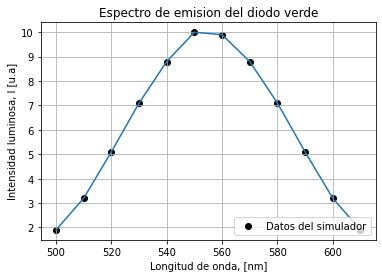

In [ ]:
valx=df.loc[:lim[3],df.columns[6]]
valy=df.loc[:lim[3],df.columns[7]]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values
plt.scatter(x,y,label="Datos del simulador",color="black")
plt.plot(x, y)

popt, pcov = curve_fit(gaussiana,x, y, p0 = (1.8,540,640))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: a=%2.2f, b=%2.2f, c=%2.2f' % tuple(popt))
#plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: f(x) = 5.670 e-08 x^4')

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Longitud de onda, [nm]")
plt.ylabel("Intensidad luminosa, I [u.a]")
plt.title("Espectro de emision del diodo verde")
  #Desv
a, b, c = popt
desv=0.5*c**(0.5) #desviaion estandar
desv=round(desv,0)
print(  " desviacion estandar = ",   desv, "Lambda correspondiente", b )

 desviacion estandar =  11.0 Lambda correspondiente 445.8486601326244


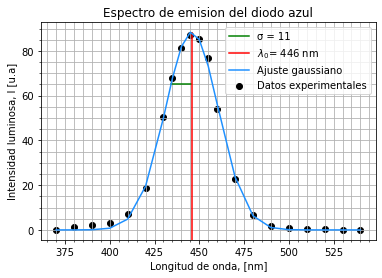

In [ ]:
valx=df.loc[:lim[4],df.columns[8]]
valy=df.loc[:lim[4],df.columns[9]]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values
plt.scatter(x,y,label="Datos experimentales",color="black")
popt, pcov = curve_fit(gaussiana,x, y, p0 = (1.8,540,640))
a, b, c = popt
desv=0.5*c**(0.5) #desviacion estandar
desv=round(desv,0)
plt.axhline(y=65,xmin=0.39,xmax=0.45, label = 'σ = 11',c="green")
plt.axvline(x=446,ymin=0,ymax=0.95, label = '$λ_0$= 446 nm',c="r")
plt.plot(x, gaussiana(x,*popt), color='dodgerblue',label="Ajuste gaussiano")



plt.minorticks_on()
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Longitud de onda, [nm]")
plt.ylabel("Intensidad luminosa, I [u.a]")
plt.title("Espectro de emision del diodo azul")
print(  " desviacion estandar = ",   desv, "Lambda correspondiente", b )


In [ ]:
'''ran = (0,2,4,6,8)
lim = [19,15,11,12,21]

for n in ran:
  valx=df.loc[:lim[n],df.columns[n]]
  valy=df.loc[:lim[n],df.columns[n+1]]
  x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
  y=valy.values
  plt.scatter(x,y,label="Datos del simulador",color="black")
  plt.plot(x, y)

  popt, pcov = curve_fit(gaussiana, x, y)
  plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: a=%2.2f, b=%2.2f, c=%2.2f' % tuple(popt))
  #plt.plot(x, gaussiana(x, *popt), 'r-', label='fit: f(x) = 5.670 e-08 x^4')

  plt.grid(b=True,which="both")
  plt.legend(loc="lower right")
  plt.loglog(basex=10,basey=10)
  plt.xlabel("Longitud de onda, [nm]")
  plt.ylabel("Intensidad luminosa, I [u.a]")
  plt.title("Espectro de emision del " + df.iloc[n,10].lower())
  #Desv
  a, b, c = popt
  desv=0.5*c**(0.5) #desviaion estandar
  desv=round(desv,0)
  print(  " desviacion estandar para ", df.iloc[n,10],  desv, "Lambda correspondiente", b )'''

'ran = (0,2,4,6,8)\nlim = [19,15,11,12,21]\n\nfor n in ran:\n  valx=df.loc[:lim[n],df.columns[n]]\n  valy=df.loc[:lim[n],df.columns[n+1]]\n  x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy\n  y=valy.values\n  plt.scatter(x,y,label="Datos del simulador",color="black")\n  plt.plot(x, y)\n\n  popt, pcov = curve_fit(gaussiana, x, y)\n  plt.plot(x, gaussiana(x, *popt), \'r-\', label=\'fit: a=%2.2f, b=%2.2f, c=%2.2f\' % tuple(popt))\n  #plt.plot(x, gaussiana(x, *popt), \'r-\', label=\'fit: f(x) = 5.670 e-08 x^4\')\n\n  plt.grid(b=True,which="both")\n  plt.legend(loc="lower right")\n  plt.loglog(basex=10,basey=10)\n  plt.xlabel("Longitud de onda, [nm]")\n  plt.ylabel("Intensidad luminosa, I [u.a]")\n  plt.title("Espectro de emision del " + df.iloc[n,10].lower())\n  #Desv\n  a, b, c = popt\n  desv=0.5*c**(0.5) #desviaion estandar\n  desv=round(desv,0)\n  print(  " desviacion estandar para ", df